In [4]:
%matplotlib inline 
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree

In [6]:
df = pd.read_csv("Titanic.csv")

In [7]:
 #cambio la variable categorica sex a numerica
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [8]:
# selecciono las caracteristicas para el modelo
data = df[['Sex_male', 'Fare', 'Age', 'Pclass', 'SibSp', 'Survived']]
data.head()

,Sex_male,Fare,Age,Pclass,SibSp,Survived
0,True,7.2500,22.0,3,1,0
1,False,71.2833,38.0,1,1,1
2,False,7.9250,26.0,3,0,1
3,False,53.1000,35.0,1,1,1
4,True,8.0500,35.0,3,0,0


In [9]:
#divido los data
from sklearn.model_selection import train_test_split
X = data.drop(["Survived"], axis=1)
Y = data.Survived

X_train, X_test, y_train, y_test = train_test_split(X,Y,random_state=0)


In [10]:
#creo el modelo
model = tree.DecisionTreeClassifier(max_leaf_nodes=10)

In [11]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=10)

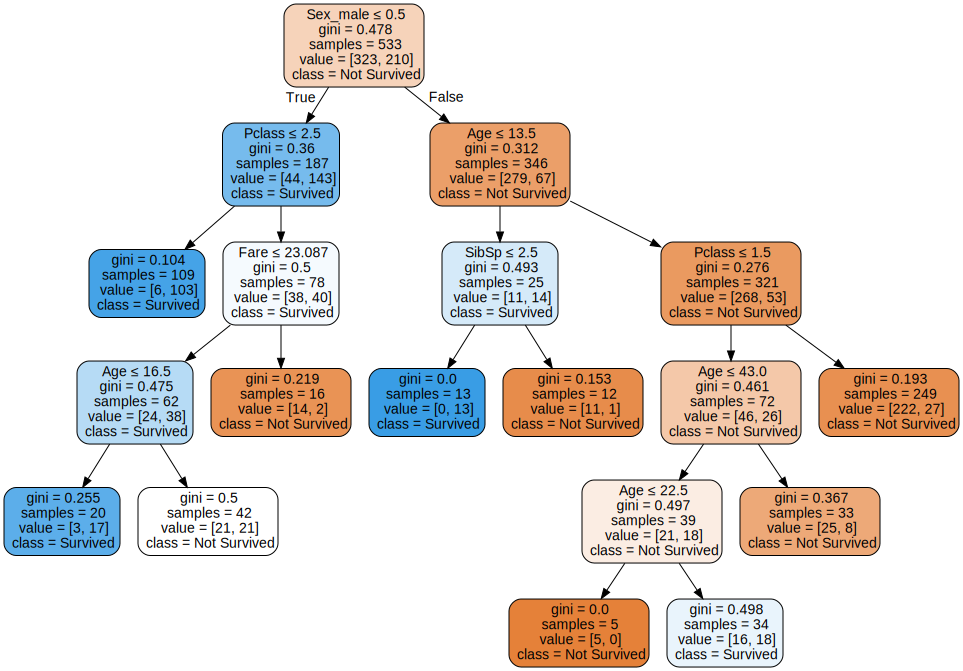

In [13]:
import graphviz 

dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=X_train.columns.values,  
                         class_names=['Not Survived','Survived'],
                         filled=True, rounded=True,  
                         special_characters=True,leaves_parallel = False)  
graph = graphviz.Source(dot_data)  
graph 

In [14]:
#accuracy promedio 
model.score(X_test, y_test)

0.8202247191011236

In [17]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
matriz = confusion_matrix(y_test,y_pred)

matriz

array([[89, 12],
       [20, 57]], dtype=int64)